In [2]:
pip install vadersentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import csv
import re
from textblob import TextBlob



In [4]:
news=[]
date=[]

for j in range(1,250):
  webpage=requests.get('https://markets.businessinsider.com/news/amzn-stock?p={}'.format(j)).text
  soup=BeautifulSoup(webpage,'lxml')
  newz2=soup.find_all('div',class_='latest-news__story')

  for i in newz2:
    news.append(i.find('a',class_='news-link').text.strip())
    date.append(i.find('time',class_='latest-news__date')['datetime'])



# final=pd.DataFrame()
df=pd.DataFrame({'Datetime':date,
        'News':news,
    })

df

,Datetime,News
0,6/19/2024 8:04:27 PM,Rag to Riches: 3 Autonomous Driving Stocks Tha...
1,6/19/2024 5:23:48 PM,3 Stocks You Don’t Want to Be Caught Holding W...
2,6/19/2024 12:43:12 PM,Amazon Fined $5.9 Mln By California For Labor ...
3,6/19/2024 12:00:00 PM,Blue Chip Lovers: 3 Safe Stocks to Double Your...
4,6/19/2024 11:01:00 AM,3 Tech Stocks That Will Rise Thanks to Google’...
...,...,...
12445,2/11/2020 4:42:59 PM,Why Microsoft Should Spinoff Its Cloud Business
12446,2/11/2020 4:23:25 PM,3 Blistering Tech Stocks to Buy at All-Time Highs
12447,2/11/2020 3:36:06 PM,"Bernie Sanders, Elizabeth Warren, and 13 other..."
12448,2/11/2020 3:27:23 PM,7 Hot & Trendy Generation Z Stocks to Buy


In [5]:
#Extracting historical data from yahoo finance
df1=pd.read_csv('AMZN-2.csv')
df1_reversed = df1.iloc[::-1].reset_index(drop=True)
df1_reversed

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-06-11,187.059998,187.770004,184.537292,187.229996,187.229996,27191845
1,2024-06-10,184.070007,187.229996,183.789993,187.059998,187.059998,34494500
2,2024-06-07,184.899994,186.289993,183.360001,184.300003,184.300003,28021500
3,2024-06-06,181.750000,185.000000,181.490005,185.000000,185.000000,31371200
4,2024-06-05,180.100006,181.500000,178.750000,181.279999,181.279999,32116400
...,...,...,...,...,...,...,...
1090,2020-02-11,107.544998,109.297501,106.800003,107.540001,107.540001,114920000
1091,2020-02-10,104.250504,106.779999,104.248001,106.695503,106.695503,101124000
1092,2020-02-07,102.099503,104.926498,101.904999,103.963997,103.963997,101906000
1093,2020-02-06,102.051003,102.815002,101.239998,102.511497,102.511497,63660000


In [6]:
#Merging the dataframe df with all the news of the same date

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date
df_grouped = df.groupby('Date')['News'].apply(' '.join).reset_index()
df1_grouped = df_grouped.iloc[::-1].reset_index(drop=True)
df1_grouped

<ipython-input-6-6ffefb5438a4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


,Date,News
0,2024-06-19,Rag to Riches: 3 Autonomous Driving Stocks Tha...
1,2024-06-18,Economist React To May Retail Sales Data: 'Con...
2,2024-06-17,Retail Sales Preview: May Numbers Expected To ...
3,2024-06-15,"3 AI Stocks to Turn $10,000 Into $1 Million: J..."
4,2024-06-14,Alphabet Google Nears Zero-Carbon Goals With N...
...,...,...
1486,2020-02-15,"Amazon, Flipkart seek rollback of new Indian t..."
1487,2020-02-14,"Stock Market Today: Nvidia Rips, Roku Dips Ama..."
1488,2020-02-13,Judge grants Amazon motion for pause in Micros...
1489,2020-02-12,Jeff Bezos has reportedly broken California's ...


In [7]:
#CLeaning the data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize
    words = word_tokenize(text)

    # Convert to lower case
    words = [word.lower() for word in words]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back to string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply preprocessing to the news column
df1_grouped['clean_data'] = df1_grouped['News'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.3 MB/s eta 0:00:00


In [9]:
import textstat
# Function to calculate readability score
def readability_score(text):
    return textstat.flesch_reading_ease(text)

# Apply the readability score calculation to the clean_data column
df1_grouped['readability_score'] = df1_grouped['clean_data'].apply(readability_score)

print(df1_grouped)


            Date                                               News  \
0     2024-06-19  Rag to Riches: 3 Autonomous Driving Stocks Tha...   
1     2024-06-18  Economist React To May Retail Sales Data: 'Con...   
2     2024-06-17  Retail Sales Preview: May Numbers Expected To ...   
3     2024-06-15  3 AI Stocks to Turn $10,000 Into $1 Million: J...   
4     2024-06-14  Alphabet Google Nears Zero-Carbon Goals With N...   
...          ...                                                ...   
1486  2020-02-15  Amazon, Flipkart seek rollback of new Indian t...   
1487  2020-02-14  Stock Market Today: Nvidia Rips, Roku Dips Ama...   
1488  2020-02-13  Judge grants Amazon motion for pause in Micros...   
1489  2020-02-12  Jeff Bezos has reportedly broken California's ...   
1490  2020-02-11  FTC demands data on small buys by Google, Amaz...   

                                             clean_data  readability_score  
0     rag rich : 3 autonomous driving stock could ma...              5

In [10]:
#word frequency
def count_words(text):
  words = word_tokenize(text)
  return len(words)

# Apply the count_words function to the clean_data column
df1_grouped['word_count'] = df1_grouped['clean_data'].apply(count_words)

# Print the DataFrame
df1_grouped


,Date,News,clean_data,readability_score,word_count
0,2024-06-19,Rag to Riches: 3 Autonomous Driving Stocks Tha...,rag rich : 3 autonomous driving stock could ma...,56.93,71
1,2024-06-18,Economist React To May Retail Sales Data: 'Con...,economist react may retail sale data : 'consum...,37.81,96
2,2024-06-17,Retail Sales Preview: May Numbers Expected To ...,retail sale preview : may number expected rise...,39.34,93
3,2024-06-15,"3 AI Stocks to Turn $10,000 Into $1 Million: J...","3 ai stock turn $ 10,000 $ 1 million : june 20...",80.62,20
4,2024-06-14,Alphabet Google Nears Zero-Carbon Goals With N...,alphabet google nears zero-carbon goal nv ener...,-2.97,71
...,...,...,...,...,...
1486,2020-02-15,"Amazon, Flipkart seek rollback of new Indian t...","amazon , flipkart seek rollback new indian tax...",26.14,31
1487,2020-02-14,"Stock Market Today: Nvidia Rips, Roku Dips Ama...","stock market today : nvidia rip , roku dip ama...",-10.75,187
1488,2020-02-13,Judge grants Amazon motion for pause in Micros...,judge grant amazon motion pause microsoft 's p...,-89.75,338
1489,2020-02-12,Jeff Bezos has reportedly broken California's ...,jeff bezos reportedly broken california 's rec...,-92.29,188


In [11]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
# Load spaCy model
import spacy
nlp = spacy.load('en_core_web_sm')

# Function to calculate the ratio of named entities to total words
def named_entity_ratio(text):
    doc = nlp(text)
    num_entities = len(doc.ents)
    num_words = len(text.split())
    return num_entities / num_words if num_words > 0 else 0

# Apply the named entity ratio calculation to the clean_data column
df1_grouped['entity_ratio'] = df1_grouped['clean_data'].apply(named_entity_ratio)

df1_grouped

,Date,News,clean_data,readability_score,word_count,entity_ratio
0,2024-06-19,Rag to Riches: 3 Autonomous Driving Stocks Tha...,rag rich : 3 autonomous driving stock could ma...,56.93,71,0.154930
1,2024-06-18,Economist React To May Retail Sales Data: 'Con...,economist react may retail sale data : 'consum...,37.81,96,0.083333
2,2024-06-17,Retail Sales Preview: May Numbers Expected To ...,retail sale preview : may number expected rise...,39.34,93,0.118280
3,2024-06-15,"3 AI Stocks to Turn $10,000 Into $1 Million: J...","3 ai stock turn $ 10,000 $ 1 million : june 20...",80.62,20,0.250000
4,2024-06-14,Alphabet Google Nears Zero-Carbon Goals With N...,alphabet google nears zero-carbon goal nv ener...,-2.97,71,0.140845
...,...,...,...,...,...,...
1486,2020-02-15,"Amazon, Flipkart seek rollback of new Indian t...","amazon , flipkart seek rollback new indian tax...",26.14,31,0.129032
1487,2020-02-14,"Stock Market Today: Nvidia Rips, Roku Dips Ama...","stock market today : nvidia rip , roku dip ama...",-10.75,187,0.106952
1488,2020-02-13,Judge grants Amazon motion for pause in Micros...,judge grant amazon motion pause microsoft 's p...,-89.75,338,0.183432
1489,2020-02-12,Jeff Bezos has reportedly broken California's ...,jeff bezos reportedly broken california 's rec...,-92.29,188,0.111702


In [13]:
df1_grouped

,Date,News,clean_data,readability_score,word_count,entity_ratio
0,2024-06-19,Rag to Riches: 3 Autonomous Driving Stocks Tha...,rag rich : 3 autonomous driving stock could ma...,56.93,71,0.154930
1,2024-06-18,Economist React To May Retail Sales Data: 'Con...,economist react may retail sale data : 'consum...,37.81,96,0.083333
2,2024-06-17,Retail Sales Preview: May Numbers Expected To ...,retail sale preview : may number expected rise...,39.34,93,0.118280
3,2024-06-15,"3 AI Stocks to Turn $10,000 Into $1 Million: J...","3 ai stock turn $ 10,000 $ 1 million : june 20...",80.62,20,0.250000
4,2024-06-14,Alphabet Google Nears Zero-Carbon Goals With N...,alphabet google nears zero-carbon goal nv ener...,-2.97,71,0.140845
...,...,...,...,...,...,...
1486,2020-02-15,"Amazon, Flipkart seek rollback of new Indian t...","amazon , flipkart seek rollback new indian tax...",26.14,31,0.129032
1487,2020-02-14,"Stock Market Today: Nvidia Rips, Roku Dips Ama...","stock market today : nvidia rip , roku dip ama...",-10.75,187,0.106952
1488,2020-02-13,Judge grants Amazon motion for pause in Micros...,judge grant amazon motion pause microsoft 's p...,-89.75,338,0.183432
1489,2020-02-12,Jeff Bezos has reportedly broken California's ...,jeff bezos reportedly broken california 's rec...,-92.29,188,0.111702


In [14]:
#Subjectivity
def Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity
def Polarity(text):
  return TextBlob(text).sentiment.polarity

In [15]:
#merge subjectivity and polarity
df1_grouped['Subjectivity'] = df1_grouped['clean_data'].apply(Subjectivity)
df1_grouped['Polarity'] = df1_grouped['clean_data'].apply(Polarity)
df1_grouped


,Date,News,clean_data,readability_score,word_count,entity_ratio,Subjectivity,Polarity
0,2024-06-19,Rag to Riches: 3 Autonomous Driving Stocks Tha...,rag rich : 3 autonomous driving stock could ma...,56.93,71,0.154930,0.530000,0.295000
1,2024-06-18,Economist React To May Retail Sales Data: 'Con...,economist react may retail sale data : 'consum...,37.81,96,0.083333,0.400000,0.387500
2,2024-06-17,Retail Sales Preview: May Numbers Expected To ...,retail sale preview : may number expected rise...,39.34,93,0.118280,0.772348,0.082576
3,2024-06-15,"3 AI Stocks to Turn $10,000 Into $1 Million: J...","3 ai stock turn $ 10,000 $ 1 million : june 20...",80.62,20,0.250000,0.500000,-0.300000
4,2024-06-14,Alphabet Google Nears Zero-Carbon Goals With N...,alphabet google nears zero-carbon goal nv ener...,-2.97,71,0.140845,0.552500,0.431429
...,...,...,...,...,...,...,...,...
1486,2020-02-15,"Amazon, Flipkart seek rollback of new Indian t...","amazon , flipkart seek rollback new indian tax...",26.14,31,0.129032,0.454545,0.136364
1487,2020-02-14,"Stock Market Today: Nvidia Rips, Roku Dips Ama...","stock market today : nvidia rip , roku dip ama...",-10.75,187,0.106952,0.214425,0.004174
1488,2020-02-13,Judge grants Amazon motion for pause in Micros...,judge grant amazon motion pause microsoft 's p...,-89.75,338,0.183432,0.576476,0.035333
1489,2020-02-12,Jeff Bezos has reportedly broken California's ...,jeff bezos reportedly broken california 's rec...,-92.29,188,0.111702,0.511345,0.051366


In [16]:
#merging data
df1_reversed['Date']=pd.to_datetime(df1_reversed['Date'])
df1_grouped['Date']=pd.to_datetime(df1_grouped['Date'])
merged_df = df1_reversed.merge(df1_grouped, how='inner', on=['Date'])

In [17]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,News,clean_data,readability_score,word_count,entity_ratio,Subjectivity,Polarity
0,2024-06-11,187.059998,187.770004,184.537292,187.229996,187.229996,27191845,Rogers Communication's Deals to Aid Long-Term ...,rogers communication 's deal aid long-term pro...,15.82,101,0.089109,0.520000,0.033333
1,2024-06-10,184.070007,187.229996,183.789993,187.059998,187.059998,34494500,Palo Alto Expands Its Regionally-Hosted Cloud ...,palo alto expands regionally-hosted cloud serv...,37.81,92,0.119565,0.377778,0.400000
2,2024-06-07,184.899994,186.289993,183.360001,184.300003,184.300003,28021500,"Catalyst Watch: Apple's WWDC, Tesla's annual m...","catalyst watch : apple 's wwdc , tesla 's annu...",30.71,113,0.106195,0.383333,0.208333
3,2024-06-06,181.750000,185.000000,181.490005,185.000000,185.000000,31371200,3 Value Stocks to Buy for Incredible Long-Term...,3 value stock buy incredible long-term upside ...,24.45,39,0.153846,0.900000,0.900000
4,2024-06-05,180.100006,181.500000,178.750000,181.279999,181.279999,32116400,"S&P 500, Nasdaq 100 Jointly Hit All-Time Highs...","& p 500 , nasdaq 100 jointly hit all-time high...",-14.47,111,0.126126,0.237711,0.135260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2020-02-18,106.250999,108.303497,106.205498,107.783501,107.783501,58912000,Stock Market Today: Apple’s Coronavirus Update...,stock market today : apple ’ coronavirus updat...,-31.05,112,0.098214,0.527778,0.109259
1085,2020-02-14,107.783997,107.952003,106.294502,106.743500,106.743500,52124000,"Stock Market Today: Nvidia Rips, Roku Dips Ama...","stock market today : nvidia rip , roku dip ama...",-10.75,187,0.106952,0.214425,0.004174
1086,2020-02-13,107.249496,108.514000,107.099998,107.493500,107.493500,60636000,Judge grants Amazon motion for pause in Micros...,judge grant amazon motion pause microsoft 's p...,-89.75,338,0.183432,0.576476,0.035333
1087,2020-02-12,108.160004,109.012497,107.764503,108.000000,108.000000,66686000,Jeff Bezos has reportedly broken California's ...,jeff bezos reportedly broken california 's rec...,-92.29,188,0.111702,0.511345,0.051366


In [18]:
#Importing SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
#sentiment scores function
def getSIA(text):
  s = SentimentIntensityAnalyzer()
  senti=s.polarity_scores(text)
  return senti

In [20]:
#getting the scores
comp=[]
nega=[]
posi=[]
neut =[]
SIA =0

for i in range(0,len(merged_df['clean_data'])):
  SIA = getSIA(merged_df['clean_data'][i])
  comp.append(SIA['compound'])
  nega.append(SIA['neg'])
  posi.append(SIA['pos'])
  neut.append(SIA['neu'])

In [21]:
#Creating new colums for sentiment scores for analysis
merged_df['Compound']=comp
merged_df['Negative']=nega
merged_df['Positive']=posi
merged_df['Neutral']=neut

merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,News,clean_data,readability_score,word_count,entity_ratio,Subjectivity,Polarity,Compound,Negative,Positive,Neutral
0,2024-06-11,187.059998,187.770004,184.537292,187.229996,187.229996,27191845,Rogers Communication's Deals to Aid Long-Term ...,rogers communication 's deal aid long-term pro...,15.82,101,0.089109,0.520000,0.033333,0.9633,0.058,0.236,0.707
1,2024-06-10,184.070007,187.229996,183.789993,187.059998,187.059998,34494500,Palo Alto Expands Its Regionally-Hosted Cloud ...,palo alto expands regionally-hosted cloud serv...,37.81,92,0.119565,0.377778,0.400000,0.9118,0.078,0.190,0.732
2,2024-06-07,184.899994,186.289993,183.360001,184.300003,184.300003,28021500,"Catalyst Watch: Apple's WWDC, Tesla's annual m...","catalyst watch : apple 's wwdc , tesla 's annu...",30.71,113,0.106195,0.383333,0.208333,0.9618,0.000,0.194,0.806
3,2024-06-06,181.750000,185.000000,181.490005,185.000000,185.000000,31371200,3 Value Stocks to Buy for Incredible Long-Term...,3 value stock buy incredible long-term upside ...,24.45,39,0.153846,0.900000,0.900000,0.8807,0.000,0.286,0.714
4,2024-06-05,180.100006,181.500000,178.750000,181.279999,181.279999,32116400,"S&P 500, Nasdaq 100 Jointly Hit All-Time Highs...","& p 500 , nasdaq 100 jointly hit all-time high...",-14.47,111,0.126126,0.237711,0.135260,0.8779,0.035,0.134,0.831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2020-02-18,106.250999,108.303497,106.205498,107.783501,107.783501,58912000,Stock Market Today: Apple’s Coronavirus Update...,stock market today : apple ’ coronavirus updat...,-31.05,112,0.098214,0.527778,0.109259,0.6369,0.133,0.171,0.697
1085,2020-02-14,107.783997,107.952003,106.294502,106.743500,106.743500,52124000,"Stock Market Today: Nvidia Rips, Roku Dips Ama...","stock market today : nvidia rip , roku dip ama...",-10.75,187,0.106952,0.214425,0.004174,0.8883,0.063,0.152,0.785
1086,2020-02-13,107.249496,108.514000,107.099998,107.493500,107.493500,60636000,Judge grants Amazon motion for pause in Micros...,judge grant amazon motion pause microsoft 's p...,-89.75,338,0.183432,0.576476,0.035333,0.9781,0.084,0.194,0.721
1087,2020-02-12,108.160004,109.012497,107.764503,108.000000,108.000000,66686000,Jeff Bezos has reportedly broken California's ...,jeff bezos reportedly broken california 's rec...,-92.29,188,0.111702,0.511345,0.051366,0.9519,0.024,0.121,0.855


In [22]:
#Adding a label
merged_df['label'] = np.where(merged_df['Open'] > merged_df['Close'], 0, 1)
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,News,clean_data,readability_score,word_count,entity_ratio,Subjectivity,Polarity,Compound,Negative,Positive,Neutral,label
0,2024-06-11,187.059998,187.770004,184.537292,187.229996,187.229996,27191845,Rogers Communication's Deals to Aid Long-Term ...,rogers communication 's deal aid long-term pro...,15.82,101,0.089109,0.520000,0.033333,0.9633,0.058,0.236,0.707,1
1,2024-06-10,184.070007,187.229996,183.789993,187.059998,187.059998,34494500,Palo Alto Expands Its Regionally-Hosted Cloud ...,palo alto expands regionally-hosted cloud serv...,37.81,92,0.119565,0.377778,0.400000,0.9118,0.078,0.190,0.732,1
2,2024-06-07,184.899994,186.289993,183.360001,184.300003,184.300003,28021500,"Catalyst Watch: Apple's WWDC, Tesla's annual m...","catalyst watch : apple 's wwdc , tesla 's annu...",30.71,113,0.106195,0.383333,0.208333,0.9618,0.000,0.194,0.806,0
3,2024-06-06,181.750000,185.000000,181.490005,185.000000,185.000000,31371200,3 Value Stocks to Buy for Incredible Long-Term...,3 value stock buy incredible long-term upside ...,24.45,39,0.153846,0.900000,0.900000,0.8807,0.000,0.286,0.714,1
4,2024-06-05,180.100006,181.500000,178.750000,181.279999,181.279999,32116400,"S&P 500, Nasdaq 100 Jointly Hit All-Time Highs...","& p 500 , nasdaq 100 jointly hit all-time high...",-14.47,111,0.126126,0.237711,0.135260,0.8779,0.035,0.134,0.831,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2020-02-18,106.250999,108.303497,106.205498,107.783501,107.783501,58912000,Stock Market Today: Apple’s Coronavirus Update...,stock market today : apple ’ coronavirus updat...,-31.05,112,0.098214,0.527778,0.109259,0.6369,0.133,0.171,0.697,1
1085,2020-02-14,107.783997,107.952003,106.294502,106.743500,106.743500,52124000,"Stock Market Today: Nvidia Rips, Roku Dips Ama...","stock market today : nvidia rip , roku dip ama...",-10.75,187,0.106952,0.214425,0.004174,0.8883,0.063,0.152,0.785,0
1086,2020-02-13,107.249496,108.514000,107.099998,107.493500,107.493500,60636000,Judge grants Amazon motion for pause in Micros...,judge grant amazon motion pause microsoft 's p...,-89.75,338,0.183432,0.576476,0.035333,0.9781,0.084,0.194,0.721,1
1087,2020-02-12,108.160004,109.012497,107.764503,108.000000,108.000000,66686000,Jeff Bezos has reportedly broken California's ...,jeff bezos reportedly broken california 's rec...,-92.29,188,0.111702,0.511345,0.051366,0.9519,0.024,0.121,0.855,0


In [23]:
#Model training
final_col=['Open','Volume','Subjectivity','Polarity','entity_ratio','word_count','readability_score','Compound','Negative','Positive','Neutral','label']
mod_train=merged_df[final_col]
mod_train

,Open,Volume,Subjectivity,Polarity,entity_ratio,word_count,readability_score,Compound,Negative,Positive,Neutral,label
0,187.059998,27191845,0.520000,0.033333,0.089109,101,15.82,0.9633,0.058,0.236,0.707,1
1,184.070007,34494500,0.377778,0.400000,0.119565,92,37.81,0.9118,0.078,0.190,0.732,1
2,184.899994,28021500,0.383333,0.208333,0.106195,113,30.71,0.9618,0.000,0.194,0.806,0
3,181.750000,31371200,0.900000,0.900000,0.153846,39,24.45,0.8807,0.000,0.286,0.714,1
4,180.100006,32116400,0.237711,0.135260,0.126126,111,-14.47,0.8779,0.035,0.134,0.831,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1084,106.250999,58912000,0.527778,0.109259,0.098214,112,-31.05,0.6369,0.133,0.171,0.697,1
1085,107.783997,52124000,0.214425,0.004174,0.106952,187,-10.75,0.8883,0.063,0.152,0.785,0
1086,107.249496,60636000,0.576476,0.035333,0.183432,338,-89.75,0.9781,0.084,0.194,0.721,1
1087,108.160004,66686000,0.511345,0.051366,0.111702,188,-92.29,0.9519,0.024,0.121,0.855,0


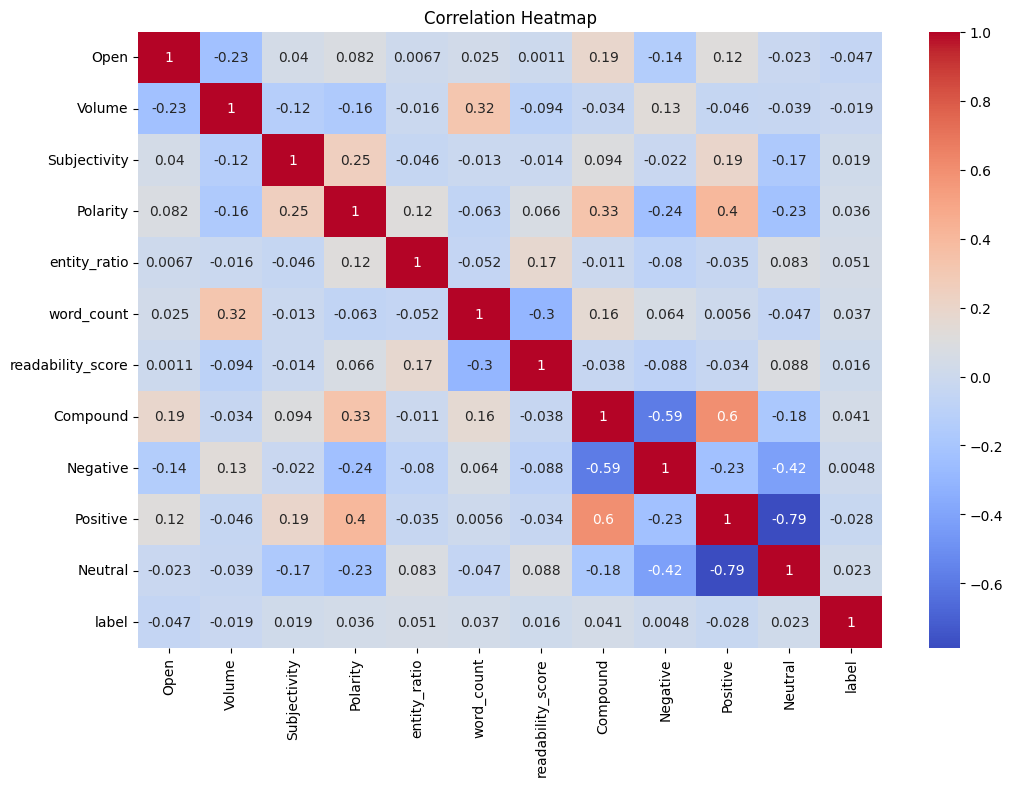

In [24]:
#Correlation heatmap of the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = mod_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

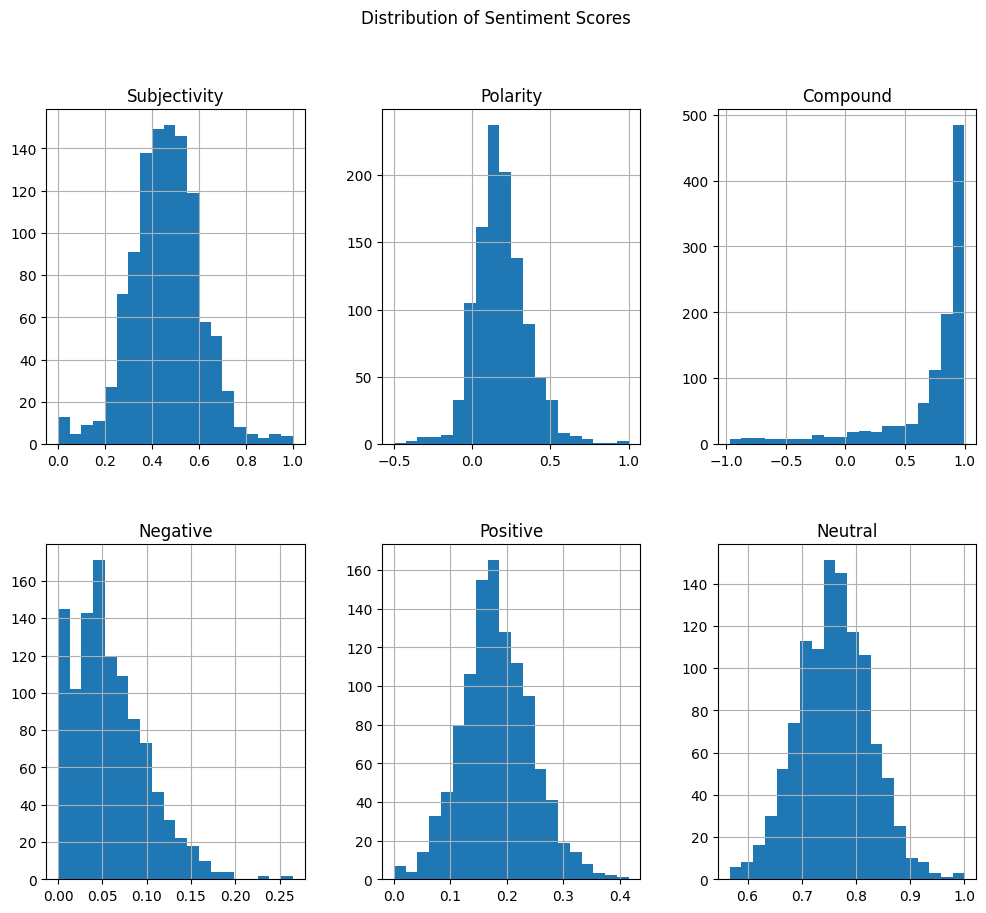

In [25]:
#Histogram
sentiment_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Neutral']
mod_train[sentiment_columns].hist(bins=20, figsize=(12, 10), layout=(2, 3))
plt.suptitle('Distribution of Sentiment Scores')
plt.show()


In [26]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and target variable
mod_train8 = mod_train.copy()
X8 = mod_train8.drop('label',axis=1)
y8 = mod_train8['label']
# Split the data
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X8_train_scaled = scaler.fit_transform(X8_train)
X8_test_scaled = scaler.transform(X8_test)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', None],
    'n_components': [None, 2, 3, 4]  # Adjust as needed based on your data dimensionality
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit GridSearchCV to the training data
grid_search.fit(X8_train_scaled, y8_train)
# Best estimator from the grid search
best_lda = grid_search.best_estimator_
# Make predictions with the best LDA model
predictions_lda = best_lda.predict(X8_test_scaled)
# Evaluate the best LDA model
accuracy = accuracy_score(y8_test, predictions_lda)
report = classification_report(y8_test, predictions_lda)
print("Best LDA Model Parameters:")
print(best_lda)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)


Best LDA Model Parameters:
LinearDiscriminantAnalysis()

Accuracy: 0.5642201834862385

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55        99
           1       0.61      0.55      0.58       119

    accuracy                           0.56       218
   macro avg       0.56      0.57      0.56       218
weighted avg       0.57      0.56      0.57       218



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

---------------------------------------------------------------------------

In [27]:
#SVM model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and target variable
mod_train7 = mod_train.copy()
X7 = mod_train7.drop('label',axis=1)
y7 = mod_train7['label']
# Split the data
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X7_train_scaled = scaler.fit_transform(X7_train)
X7_test_scaled = scaler.transform(X7_test)

# Initialize the SVM model
svm = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit GridSearchCV to the training data
grid_search.fit(X7_train_scaled, y7_train)
# Best estimator from the grid search
best_svm = grid_search.best_estimator_
# Make predictions with the best SVM model
predictions_svm = best_svm.predict(X7_test_scaled)
# Evaluate the best SVM model
accuracy = accuracy_score(y7_test, predictions_svm)
report = classification_report(y7_test, predictions_svm)
print("Best SVM Model Parameters:")
print(best_svm)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)


Best SVM Model Parameters:
SVC(C=0.1, kernel='linear')

Accuracy: 0.5850458715596331

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.59      0.54        99
           1       0.61      0.53      0.57       119

    accuracy                           0.56       218
   macro avg       0.56      0.56      0.55       218
weighted avg       0.56      0.56      0.56       218



Sharpe Ratio: 0.3022783485156837
Maximum Drawdown: 1.032258064516129
Number of Trades Executed: 216
Win Ratio: 0.5592592592592593


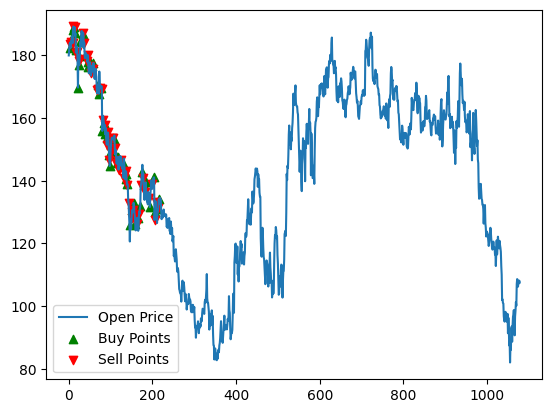

Final Portfolio: 10017.630019000002
Final Returns: 1.0017630019000001


In [39]:
#momentum strategy
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# Load the data
data9 = merged_df.copy()

# Calculate momentum
momentum_window = 10  # Look-back period for momentum calculation
data9['Momentum'] = data9['Open'].pct_change(momentum_window)

# Drop NaN values
data9.dropna(inplace=True)

# Create the features and target variables
features = ['Open', 'Volume', 'Subjectivity', 'Polarity', 'entity_ratio', 'readability_score', 'Compound', 'Negative', 'Positive', 'Neutral', 'Momentum']
X20 = data9[features]
y20 = data9['label']
# Standardize the features
scaler = StandardScaler()
X20_scaled = scaler.fit_transform(X20)
# Split the data into training and test sets
X20_train, X20_test, y20_train, y20_test = train_test_split(X20_scaled, y20, test_size=0.2, random_state=0)

# Optimize the Gradient Boosting model with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X20_train, y20_train)
# Train the optimized Gradient Boosting model
best_gbc = grid_search.best_estimator_
best_gbc.fit(X20_train, y20_train)
# Make predictions on the test set
predictions = best_gbc.predict(X20_test)
accuracy = accuracy_score(y20_test, predictions)
report = classification_report(y20_test, predictions)

# Calculate the performance metrics
sharpe_ratio = (np.mean(predictions) - np.mean(y20_test)) / np.std(predictions - y20_test)
cumulative_returns = np.cumsum(predictions - y20_test)
max_drawdown = (np.max(cumulative_returns) - np.min(cumulative_returns)) / np.max(cumulative_returns)
num_trades = len(predictions)
win_ratio = np.mean(predictions == y20_test)
# Print the performance metrics
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)
print("Number of Trades Executed:", num_trades)
print("Win Ratio:", win_ratio)
# Devise a trading strategy
buy_points = []
sell_points = []
for i in range(1, len(predictions)):
    if predictions[i] == 1 and predictions[i-1] == 0:
        buy_points.append(i)
    elif predictions[i] == 0 and predictions[i-1] == 1:
        sell_points.append(i)
# Plot the buy and sell points
plt.plot(data9['Open'].values, label='Open Price')
plt.scatter(buy_points, data9['Open'].values[buy_points], color='green', marker='^', label='Buy Points')
plt.scatter(sell_points, data9['Open'].values[sell_points], color='red', marker='v', label='Sell Points')
plt.legend()
plt.show()
# Calculate the final portfolio and returns
initial_portfolio = 10000
final_portfolio = initial_portfolio
for i in range(min(len(buy_points), len(sell_points))):
    final_portfolio += data9['Open'].values[sell_points[i]] - data9['Open'].values[buy_points[i]]
final_returns = final_portfolio / initial_portfolio
print("Final Portfolio:", final_portfolio)
print("Final Returns:", final_returns)
